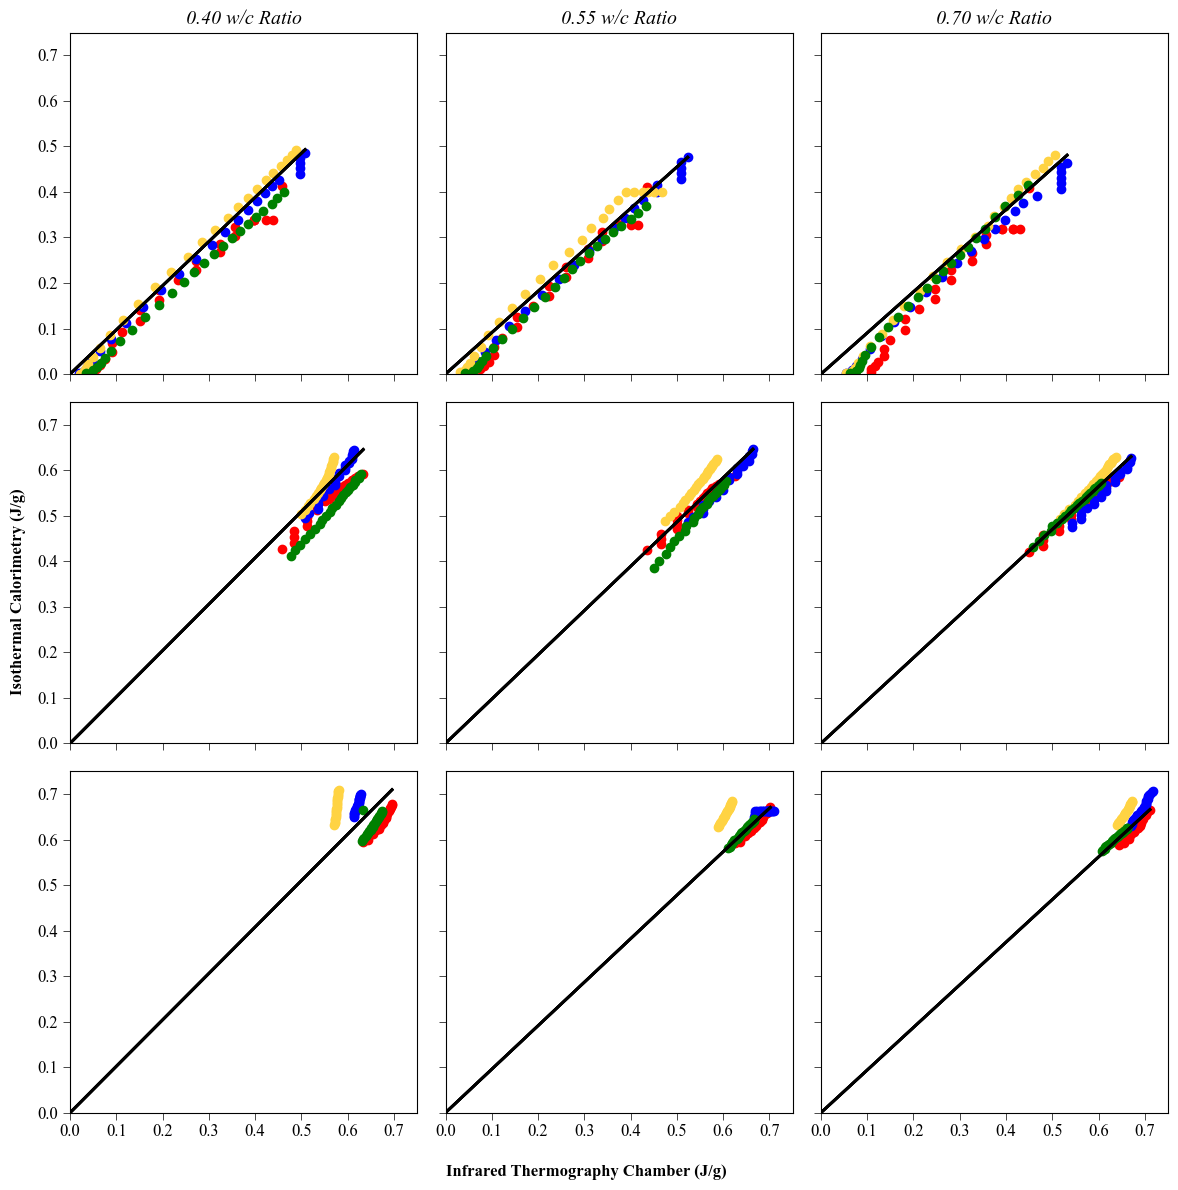

In [1]:
# Datasent Inforamtion
# What is the "name" of the dataset? Cement Paste Data
# Where did you obtain it? I collected the samples
# Where can we obtain it? (i.e., URL): Will be available after first publication.
# What is the license of the dataset? What are we allowed to do with it? None and do not share.
# How big is it in file size and in items? 21,837 KB


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MultipleLocator
def customize_ticks(ax, x_major, x_minor, y_major, y_minor):
    """
    Customize the ticks on the x and y axes
    
    Parameters:
    ax (object): The axes object to customize
    x_major (int): The frequency for major ticks on the x-axis
    x_minor (int): The frequency for minor ticks on the x-axis
    y_major (int): The frequency for major ticks on the y-axis
    y_minor (int): The frequency for minor ticks on the y-axis
    
    Returns:
    ax (object): The customized axes object
    """
    
    # Set the frequency of major ticks on the x-axis
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    # Set the frequency of minor ticks on the x-axis
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))

    # Set the frequency of major ticks on the y-axis
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    # Set the frequency of minor ticks on the y-axis
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))

    # Set tick parameters: length, width, and size of labels for major ticks (labelsize also affects minor ticks)
    ax.tick_params(axis='both', which='major', length=5, width=0.5, labelsize=12)
    # Set tick parameters: length and width for minor ticks
    ax.tick_params(axis='both', which='minor', length=2.5, width=0.5)

    return ax
# Define the font properties for the plot
font = {'family' : 'Times New Roman',
        'weight' : 'regular',
        'size'   : 12}


# Apply font properties
plt.rc('font', family='Times New Roman', weight='regular', size=12)

# Define the font size for the labels
lfs = 12

# Load data from Excel sheets
file_path = r'C:\Users\brandyd2\Downloads\231201_Infrared and Isothermal Data_Paste_Diggs_V14.xlsx'
sheets = ['Day 1 DoH', 'Day 2 DoH', 'Day 3 DoH']

# Define titles and column names for different w/c ratios (same for each day)
plot_titles = ['0.40 w/c Ratio', '0.55 w/c Ratio', '0.70 w/c Ratio']
columns_for_plots = [
    ('Infrared Thermography Chamber-0.40', 'Isothermal Calorimetry-0.40', 'xSlope-0.40', 'ySlope-0.40'),
    ('Infrared Thermography Chamber-0.55', 'Isothermal Calorimetry-0.55', 'xSlope-0.55', 'ySlope-0.55'),
    ('Infrared Thermography Chamber-0.70', 'Isothermal Calorimetry-0.70', 'xSlope-0.70', 'ySlope-0.70')
]

# Define colors for each sample category
colors = {'C1': 'red', 'C2': 'blue', 'C3': '#ffd343', 'C4': 'green'}

# Create a new figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Loop over each day and each plot
for row, sheet in enumerate(sheets):
    df = pd.read_excel(file_path, sheet_name=sheet)

    for col in range(3):
        ax = axes[row, col]

        # Set title only for the first row
        if row == 0:
            ax.set_title(plot_titles[col], fontstyle='italic')

        # Plotting logic for each subplot
        x_col, y_col, xslope, yslope = columns_for_plots[col]
        for category, color in colors.items():
            subset = df[df['Sample-0.40'] == category]
            ax.scatter(subset[x_col], subset[y_col], color=color, label=category if col == 0 and row == 0 else "")
            ax.plot(df[xslope], df[yslope], color='black', linewidth=2)

        # Customize axis labels and ticks
        if row == 2:  # Only for the last row
            ax.set_xlabel('', fontsize=lfs, weight='bold', color='k')
        else:
            ax.set_xticklabels([])  # Remove x-axis tick labels for the first and second rows

        if col == 0:  # Only for the first column
            ax.set_ylabel('', fontsize=lfs, weight='bold', color='k')
        else:
            ax.set_yticklabels([])  # Remove y-axis tick labels for the second and third columns

        ax = customize_ticks(ax, x_major=0.1, x_minor=0.1, y_major=0.1, y_minor=0.1)
        ax.set_xlim(0, 0.75)
        ax.set_ylim(0, 0.75)

# Set shared x-axis and y-axis titles
fig.supxlabel('Infrared Thermography Chamber (J/g)', fontsize=lfs, weight='bold', color='k')
fig.supylabel('Isothermal Calorimetry (J/g)', fontsize=lfs, weight='bold', color='k')

# Adjust layout
plt.tight_layout()

# Save the plot
filename = os.path.join(r'C:\Users\brandyd2\Downloads', "Figure_Degree_of_Hydration_at_1_2_and_3_Days.png")
fig.savefig(filename, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()